In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Load Preprocessed Data

In [3]:
PROJECT_ROOT = Path(r'd:\PYTHON\DEEP_LEARNING')
PREPROCESSED_DIR = PROJECT_ROOT / 'preprocessed_data'

train_df = pd.read_csv(PREPROCESSED_DIR / 'train_data.csv')
val_df = pd.read_csv(PREPROCESSED_DIR / 'val_data.csv')
full_df = pd.read_csv(PREPROCESSED_DIR / 'full_processed_data.csv')

with open(PREPROCESSED_DIR / 'class_weights.json', 'r') as f:
    class_weights = json.load(f)

print("✅ Data loaded successfully!")
print(f"Training set: {len(train_df):,} lesions")
print(f"Validation set: {len(val_df):,} lesions")
print(f"Total: {len(full_df):,} lesions")

✅ Data loaded successfully!
Training set: 4,192 lesions
Validation set: 1,048 lesions
Total: 5,240 lesions


In [4]:
DIAGNOSIS_CATEGORIES = [
    'AKIEC', 'BCC', 'BEN_OTH', 'BKL', 'DF', 
    'INF', 'MAL_OTH', 'MEL', 'NV', 'SCCKA', 'VASC'
]

print("\n📋 Training Data Sample:")
train_df.head()


📋 Training Data Sample:


lesion_id  AKIEC  BCC  BEN_OTH  BKL  DF  INF  MAL_OTH  MEL  NV  SCCKA  \
0  IL_8583674      0    0        0    0   0    0        0    1   0      0   
1  IL_0519349      0    1        0    0   0    0        0    0   0      0   
2  IL_9654222      0    1        0    0   0    0        0    0   0      0   
3  IL_7402046      0    0        0    0   0    0        0    0   0      1   
4  IL_9737107      0    0        0    0   0    0        0    0   1      0   

   VASC  age_approx     sex  skin_tone_class            site clinical_isic_id  \
0     0        75.0    male                2  head_neck_face     ISIC_8570261   
1     0        60.0  female                4  head_neck_face     ISIC_6566236   
2     0        80.0    male                4           trunk     ISIC_4726329   
3     0        55.0    male                3           trunk     ISIC_5763649   
4     0        55.0    male                4           trunk     ISIC_7225132   

   clinical_MONET_ulceration_crust  clinical_MONET_hair  \
0                         0.217078             0.109266   
1                         0.335534             0.335480   
2                         0.173937             0.190631   
3                         0.672273             0.238471   
4                         0.272317             0.138388   

   clinical_MONET_vasculature_vessels  clinical_MONET_erythema  \
0                            0.001802                 0.045582   
1                            0.006361                 0.646426   
2                            0.017397                 0.177980   
3                            0.032084                 0.493484   
4                            0.001288                 0.261306   

   clinical_MONET_pigmented  \
0                  0.924875   
1                  0.080319   
2                  0.211764   
3                  0.117205   
4                  0.715550   

   clinical_MONET_gel_water_drop_fluid_dermoscopy_liquid  \
0                                           0.018190       
1                                           0.083607       
2                                           0.222861       
3                                           0.206478       
4                                           0.099462       

   clinical_MONET_skin_markings_pen_ink_purple_pen dermoscopic_isic_id  \
0                                         0.296289        ISIC_7454892   
1                                         0.298160        ISIC_8994952   
2                                         0.058794        ISIC_9862532   
3                                         0.092811        ISIC_2611469   
4                                         0.125849        ISIC_6780966   

   dermoscopic_MONET_ulceration_crust  dermoscopic_MONET_hair  \
0                            0.692745                0.145649   
1                            0.593232                0.655854   
2                            0.203524                0.326465   
3                            0.378383                0.482250   
4                            0.633486                0.237784   

   dermoscopic_MONET_vasculature_vessels  dermoscopic_MONET_erythema  \
0                               0.007314                    0.181839   
1                               0.340784                    0.816143   
2                               0.090906                    0.155468   
3                               0.085957                    0.392820   
4                               0.108482                    0.387039   

   dermoscopic_MONET_pigmented  \
0                     0.545690   
1                     0.073327   
2                     0.600872   
3                     0.285783   
4                     0.849934   

   dermoscopic_MONET_gel_water_drop_fluid_dermoscopy_liquid  \
0                                           0.139174          
1                                           0.383124          
2                                           0.165469          
3                           

## 2. Dataset Overview Statistics

In [5]:
print("="*60)
print("DATASET OVERVIEW")
print("="*60)

print(f"\n📊 Data Shape:")
print(f"  Training: {train_df.shape}")
print(f"  Validation: {val_df.shape}")
print(f"  Full: {full_df.shape}")

print(f"\n📷 Images:")
print(f"  Total lesions: {len(full_df):,}")
print(f"  Total images: {len(full_df) * 2:,} (2 per lesion)")
print(f"  Image types: Clinical + Dermoscopic")

print(f"\n🔢 Classes:")
print(f"  Number of diagnosis categories: {len(DIAGNOSIS_CATEGORIES)}")
print(f"  Categories: {', '.join(DIAGNOSIS_CATEGORIES)}")

print(f"\n📐 Train/Val Split:")
train_ratio = len(train_df) / len(full_df)
val_ratio = len(val_df) / len(full_df)
print(f"  Train: {len(train_df):,} ({train_ratio:.1%})")
print(f"  Val: {len(val_df):,} ({val_ratio:.1%})")

print(f"\n📋 Columns: {len(full_df.columns)}")
print(f"  {list(full_df.columns)}")

DATASET OVERVIEW

📊 Data Shape:
  Training: (4192, 34)
  Validation: (1048, 34)
  Full: (5240, 34)

📷 Images:
  Total lesions: 5,240
  Total images: 10,480 (2 per lesion)
  Image types: Clinical + Dermoscopic

🔢 Classes:
  Number of diagnosis categories: 11
  Categories: AKIEC, BCC, BEN_OTH, BKL, DF, INF, MAL_OTH, MEL, NV, SCCKA, VASC

📐 Train/Val Split:
  Train: 4,192 (80.0%)
  Val: 1,048 (20.0%)

📋 Columns: 34
  ['lesion_id', 'AKIEC', 'BCC', 'BEN_OTH', 'BKL', 'DF', 'INF', 'MAL_OTH', 'MEL', 'NV', 'SCCKA', 'VASC', 'age_approx', 'sex', 'skin_tone_class', 'site', 'clinical_isic_id', 'clinical_MONET_ulceration_crust', 'clinical_MONET_hair', 'clinical_MONET_vasculature_vessels', 'clinical_MONET_erythema', 'clinical_MONET_pigmented', 'clinical_MONET_gel_water_drop_fluid_dermoscopy_liquid', 'clinical_MONET_skin_markings_pen_ink_purple_pen', 'dermoscopic_isic_id', 'dermoscopic_MONET_ulceration_crust', 'dermoscopic_MONET_hair', 'dermoscopic_MONET_vasculature_vessels', 'dermoscopic_MONET_erythe

## 3. Class Distribution Analysis

In [6]:
train_class_counts = train_df[DIAGNOSIS_CATEGORIES].sum().sort_values(ascending=False)
val_class_counts = val_df[DIAGNOSIS_CATEGORIES].sum().sort_values(ascending=False)
full_class_counts = full_df[DIAGNOSIS_CATEGORIES].sum().sort_values(ascending=False)

print("CLASS DISTRIBUTION")
print("="*60)
print(f"\n{'Category':<10} {'Train':<8} {'Val':<8} {'Total':<8} {'%':<8}")
print("-"*60)

for category in DIAGNOSIS_CATEGORIES:
    train_count = train_class_counts[category]
    val_count = val_class_counts[category]
    total_count = full_class_counts[category]
    percentage = (total_count / len(full_df)) * 100
    print(f"{category:<10} {train_count:<8.0f} {val_count:<8.0f} {total_count:<8.0f} {percentage:<8.2f}%")

CLASS DISTRIBUTION

Category   Train    Val      Total    %       
------------------------------------------------------------
AKIEC      242      61       303      5.78    %
BCC        2018     504      2522     48.13   %
BEN_OTH    35       9        44       0.84    %
BKL        435      109      544      10.38   %
DF         42       10       52       0.99    %
INF        40       10       50       0.95    %
MAL_OTH    7        2        9        0.17    %
MEL        360      90       450      8.59    %
NV         597      149      746      14.24   %
SCCKA      378      95       473      9.03    %
VASC       38       9        47       0.90    %


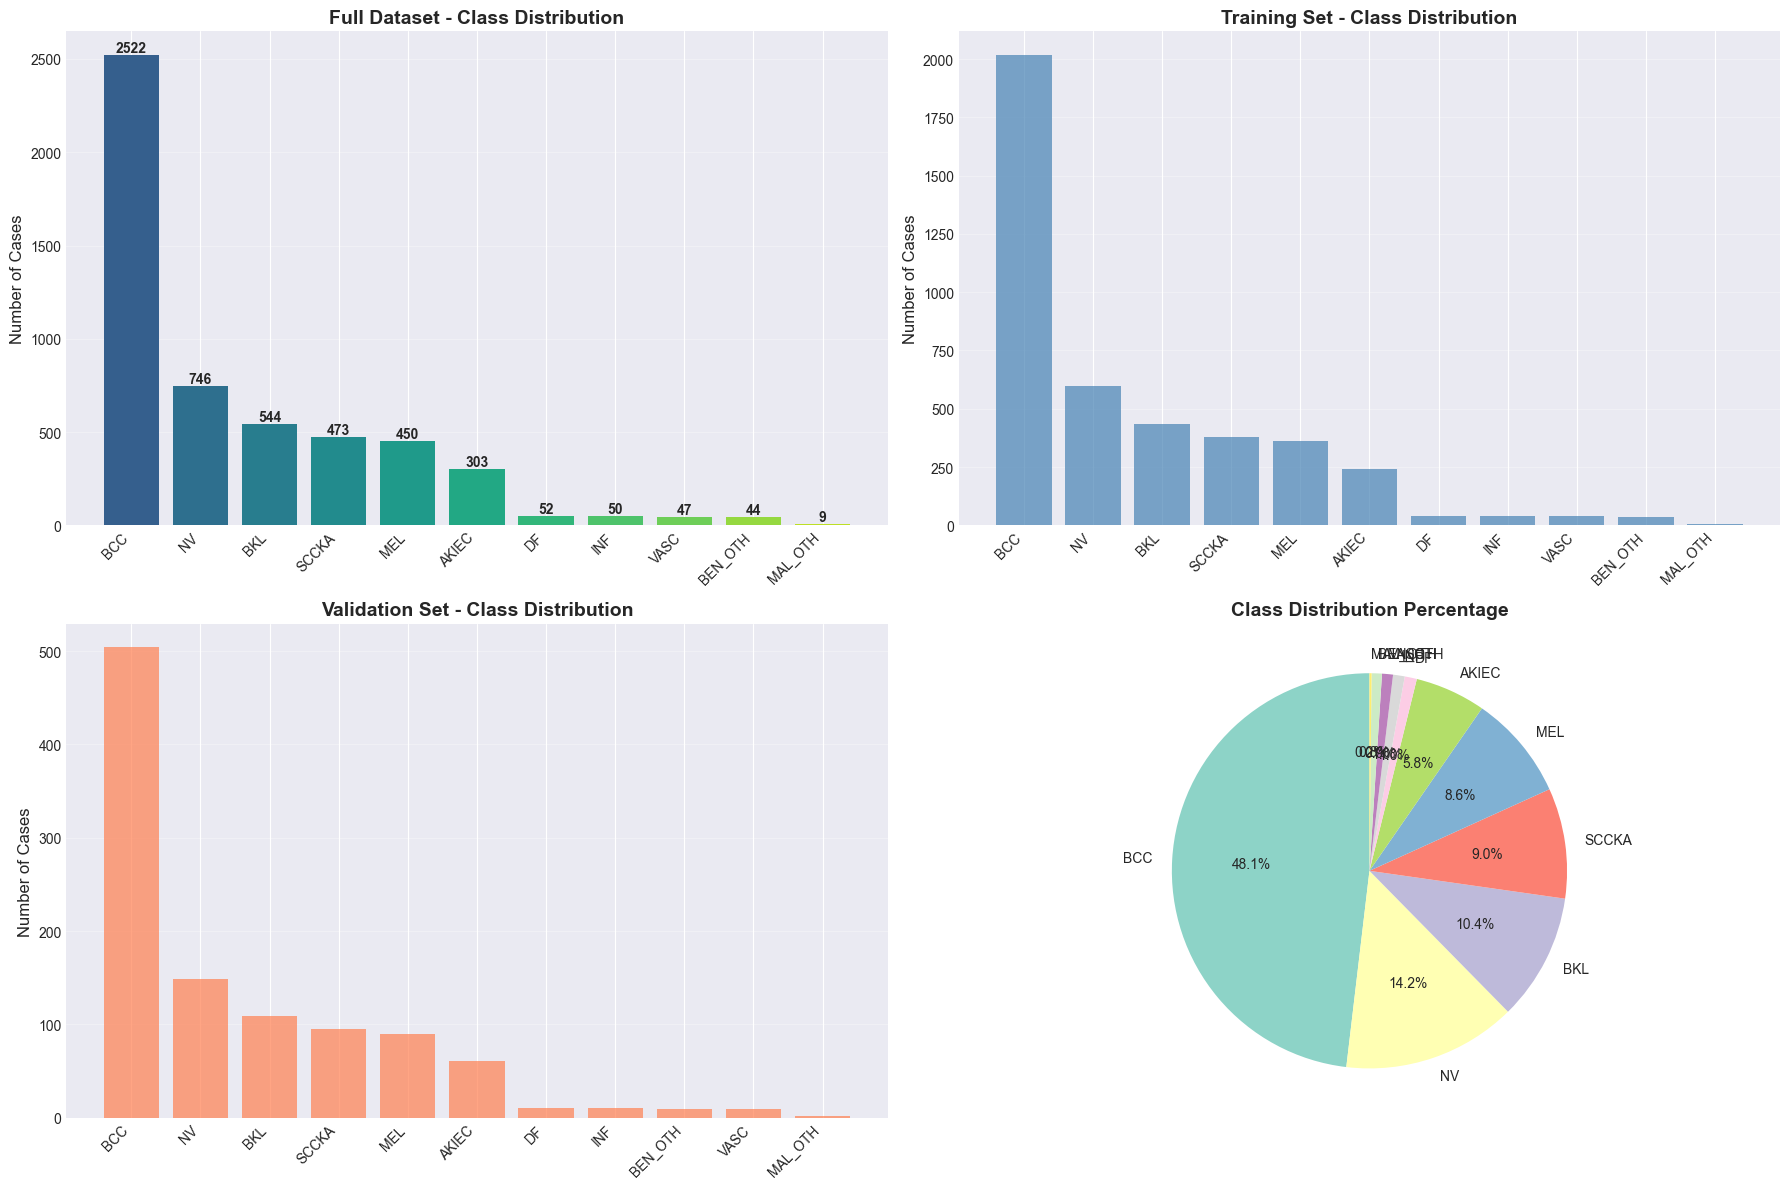

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Full dataset distribution
axes[0, 0].bar(range(len(full_class_counts)), full_class_counts.values, 
               color=plt.cm.viridis(np.linspace(0.3, 0.9, len(full_class_counts))))
axes[0, 0].set_xticks(range(len(full_class_counts)))
axes[0, 0].set_xticklabels(full_class_counts.index, rotation=45, ha='right')
axes[0, 0].set_ylabel('Number of Cases', fontsize=12)
axes[0, 0].set_title('Full Dataset - Class Distribution', fontsize=14, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(full_class_counts.values):
    axes[0, 0].text(i, v, f'{int(v)}', ha='center', va='bottom', fontweight='bold')

# Training set distribution
axes[0, 1].bar(range(len(train_class_counts)), train_class_counts.values, 
               color='steelblue', alpha=0.7)
axes[0, 1].set_xticks(range(len(train_class_counts)))
axes[0, 1].set_xticklabels(train_class_counts.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Number of Cases', fontsize=12)
axes[0, 1].set_title('Training Set - Class Distribution', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Validation set distribution
axes[1, 0].bar(range(len(val_class_counts)), val_class_counts.values, 
               color='coral', alpha=0.7)
axes[1, 0].set_xticks(range(len(val_class_counts)))
axes[1, 0].set_xticklabels(val_class_counts.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Number of Cases', fontsize=12)
axes[1, 0].set_title('Validation Set - Class Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Percentage distribution (pie chart)
axes[1, 1].pie(full_class_counts.values, labels=full_class_counts.index, autopct='%1.1f%%',
               startangle=90, colors=plt.cm.Set3(np.linspace(0, 1, len(full_class_counts))))
axes[1, 1].set_title('Class Distribution Percentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 4. Metadata Distribution Visualization

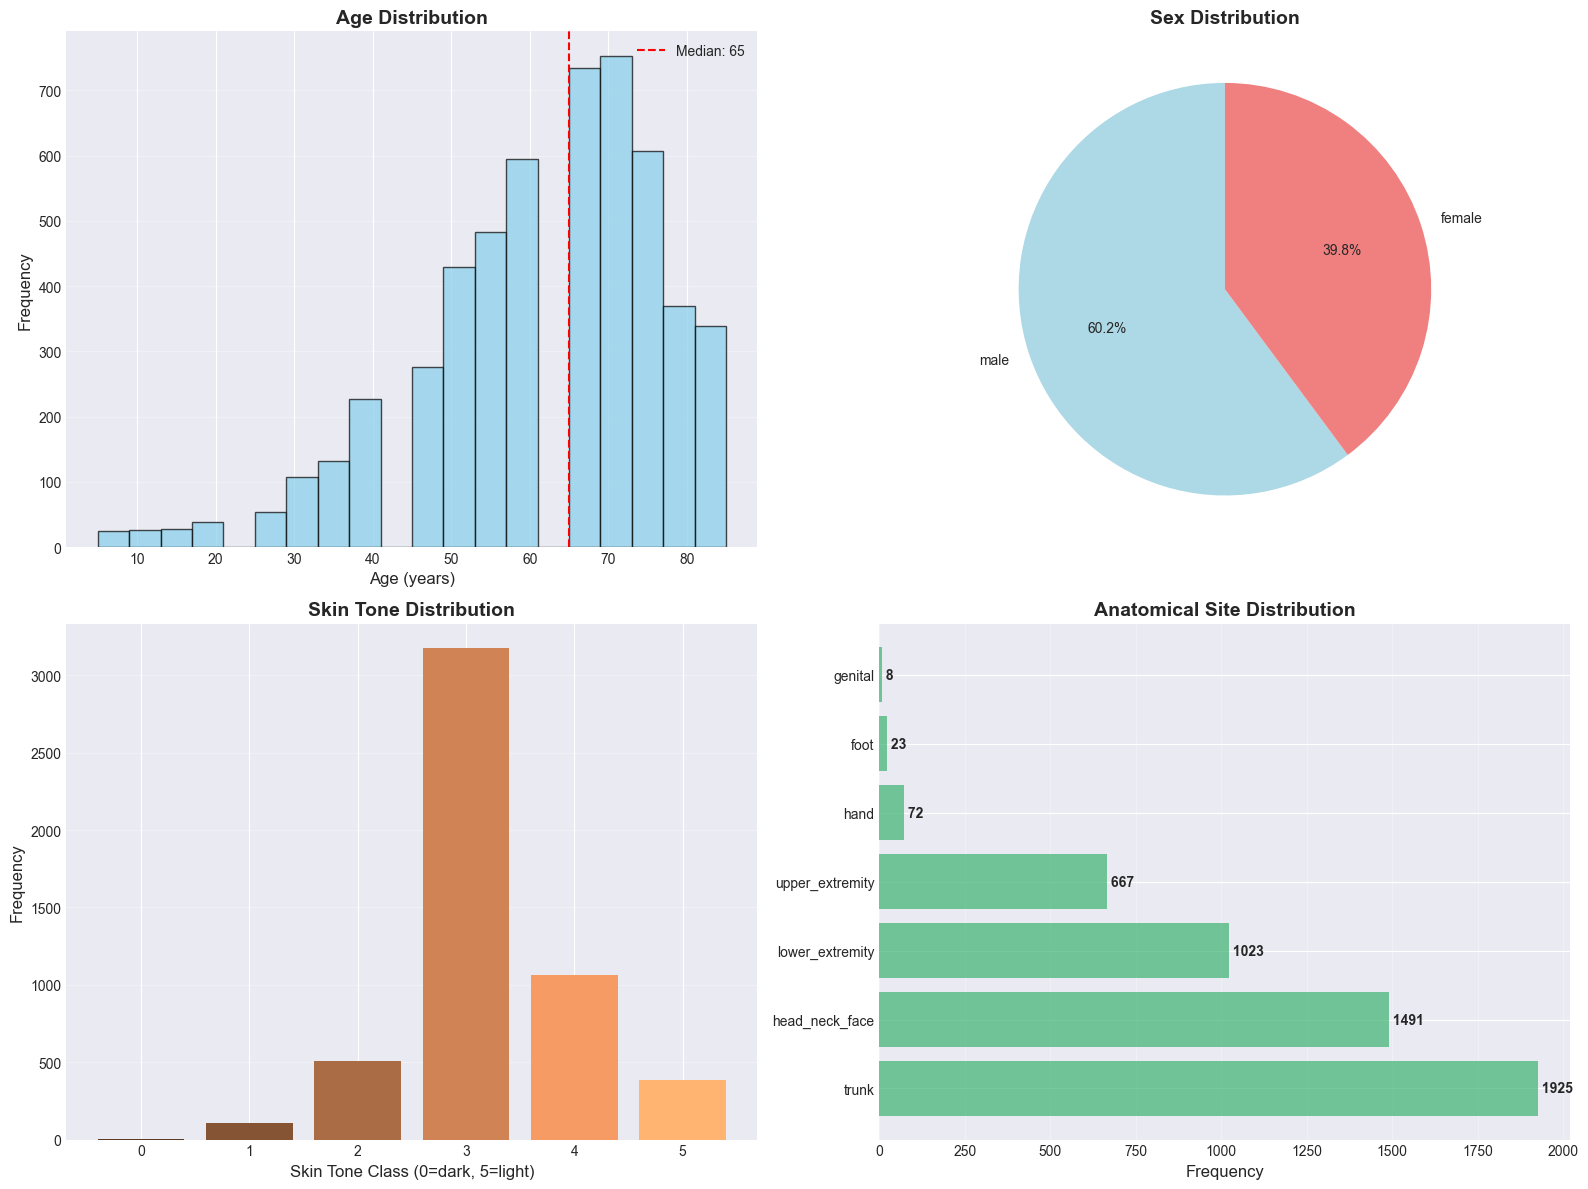

In [8]:
# Visualize metadata distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age distribution
axes[0, 0].hist(full_df['age_approx'].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Age (years)', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].axvline(full_df['age_approx'].median(), color='red', linestyle='--', 
                    label=f'Median: {full_df["age_approx"].median():.0f}')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Sex distribution
sex_counts = full_df['sex'].value_counts()
axes[0, 1].pie(sex_counts.values, labels=sex_counts.index, autopct='%1.1f%%',
               startangle=90, colors=['lightblue', 'lightcoral'])
axes[0, 1].set_title('Sex Distribution', fontsize=14, fontweight='bold')

# Skin tone distribution
skin_tone_counts = full_df['skin_tone_class'].value_counts().sort_index()
axes[1, 0].bar(skin_tone_counts.index, skin_tone_counts.values, 
               color=plt.cm.copper(np.linspace(0.3, 0.9, len(skin_tone_counts))))
axes[1, 0].set_xlabel('Skin Tone Class (0=dark, 5=light)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('Skin Tone Distribution', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Anatomical site distribution
site_counts = full_df['site'].value_counts()
axes[1, 1].barh(range(len(site_counts)), site_counts.values, color='mediumseagreen', alpha=0.7)
axes[1, 1].set_yticks(range(len(site_counts)))
axes[1, 1].set_yticklabels(site_counts.index)
axes[1, 1].set_xlabel('Frequency', fontsize=12)
axes[1, 1].set_title('Anatomical Site Distribution', fontsize=14, fontweight='bold')
axes[1, 1].grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(site_counts.values):
    axes[1, 1].text(v, i, f' {int(v)}', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

In [9]:
print("\nMETADATA STATISTICS")
print("="*60)

print(f"\n📊 Age:")
print(f"  Mean: {full_df['age_approx'].mean():.1f} years")
print(f"  Median: {full_df['age_approx'].median():.1f} years")
print(f"  Range: {full_df['age_approx'].min():.0f} - {full_df['age_approx'].max():.0f} years")

print(f"\n👥 Sex:")
for sex, count in sex_counts.items():
    print(f"  {sex}: {count:,} ({count/len(full_df)*100:.1f}%)")

print(f"\n🎨 Skin Tone:")
for tone, count in skin_tone_counts.items():
    print(f"  Class {tone}: {count:,} ({count/len(full_df)*100:.1f}%)")

print(f"\n📍 Anatomical Sites:")
for site, count in site_counts.items():
    print(f"  {site}: {count:,} ({count/len(full_df)*100:.1f}%)")


METADATA STATISTICS

📊 Age:
  Mean: 61.4 years
  Median: 65.0 years
  Range: 5 - 85 years

👥 Sex:
  male: 3,152 (60.2%)
  female: 2,088 (39.8%)

🎨 Skin Tone:
  Class 0: 6 (0.1%)
  Class 1: 105 (2.0%)
  Class 2: 506 (9.7%)
  Class 3: 3,174 (60.6%)
  Class 4: 1,066 (20.3%)
  Class 5: 383 (7.3%)

📍 Anatomical Sites:
  trunk: 1,925 (36.7%)
  head_neck_face: 1,491 (28.5%)
  lower_extremity: 1,023 (19.5%)
  upper_extremity: 667 (12.7%)
  hand: 72 (1.4%)
  foot: 23 (0.4%)
  genital: 8 (0.2%)


## 5. MONET Scores Analysis

In [10]:
clinical_monet_cols = [col for col in full_df.columns if col.startswith('clinical_MONET_')]
dermoscopic_monet_cols = [col for col in full_df.columns if col.startswith('dermoscopic_MONET_')]

print("MONET FEATURES")
print("="*60)
print(f"\nClinical MONET features: {len(clinical_monet_cols)}")
for col in clinical_monet_cols:
    print(f"  - {col.replace('clinical_MONET_', '')}")

print(f"\nDermoscopic MONET features: {len(dermoscopic_monet_cols)}")
for col in dermoscopic_monet_cols:
    print(f"  - {col.replace('dermoscopic_MONET_', '')}")

MONET FEATURES

Clinical MONET features: 7
  - ulceration_crust
  - hair
  - vasculature_vessels
  - erythema
  - pigmented
  - gel_water_drop_fluid_dermoscopy_liquid
  - skin_markings_pen_ink_purple_pen

Dermoscopic MONET features: 7
  - ulceration_crust
  - hair
  - vasculature_vessels
  - erythema
  - pigmented
  - gel_water_drop_fluid_dermoscopy_liquid
  - skin_markings_pen_ink_purple_pen


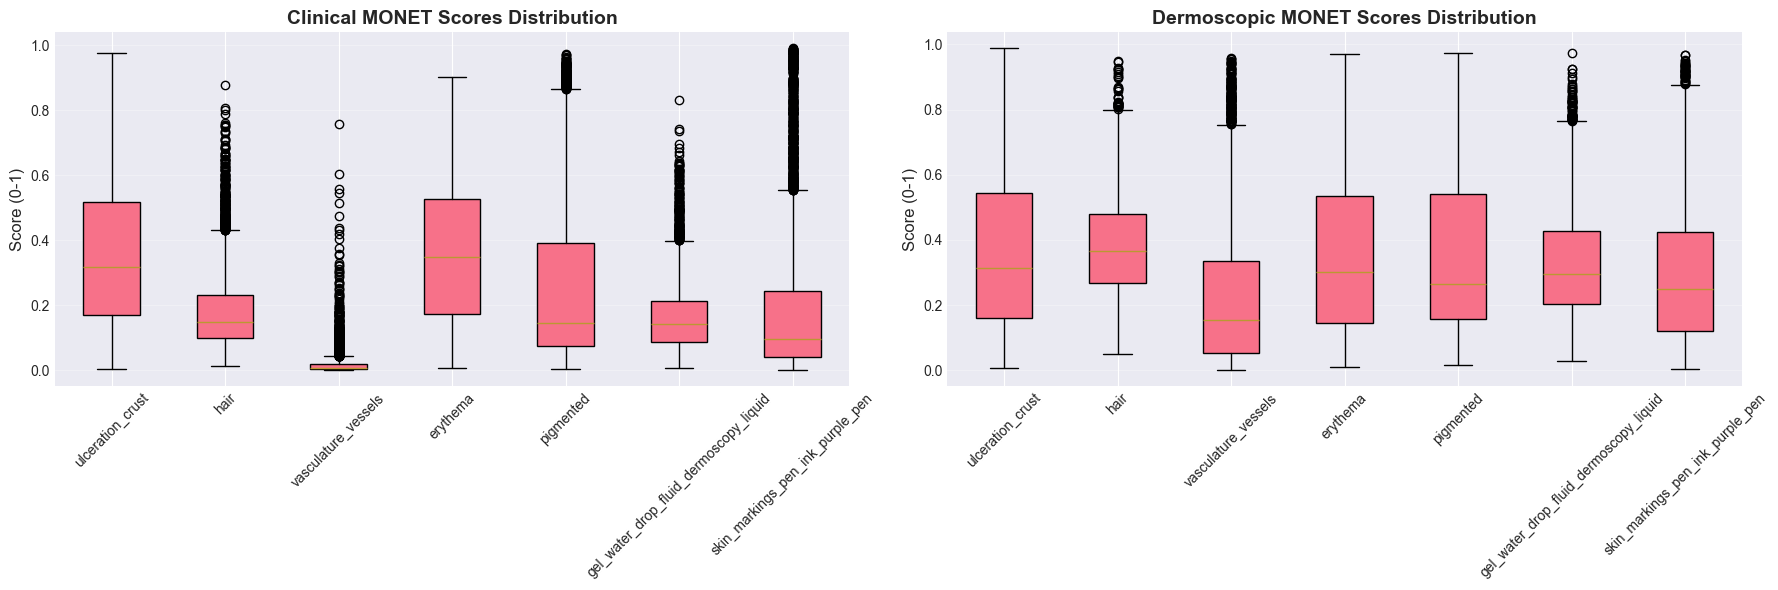

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

clinical_data = full_df[clinical_monet_cols]
clinical_data.columns = [col.replace('clinical_MONET_', '') for col in clinical_data.columns]
axes[0].boxplot([clinical_data[col].dropna() for col in clinical_data.columns],
                labels=clinical_data.columns, patch_artist=True)
axes[0].set_ylabel('Score (0-1)', fontsize=12)
axes[0].set_title('Clinical MONET Scores Distribution', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45, labelsize=10)
axes[0].grid(axis='y', alpha=0.3)

dermoscopic_data = full_df[dermoscopic_monet_cols]
dermoscopic_data.columns = [col.replace('dermoscopic_MONET_', '') for col in dermoscopic_data.columns]
axes[1].boxplot([dermoscopic_data[col].dropna() for col in dermoscopic_data.columns],
                labels=dermoscopic_data.columns, patch_artist=True)
axes[1].set_ylabel('Score (0-1)', fontsize=12)
axes[1].set_title('Dermoscopic MONET Scores Distribution', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
print("\nMONET SCORES STATISTICS")
print("="*60)

print("\n📊 Clinical MONET Scores:")
for col in clinical_monet_cols:
    feature_name = col.replace('clinical_MONET_', '')
    mean_score = full_df[col].mean()
    std_score = full_df[col].std()
    print(f"  {feature_name:<40s}: {mean_score:.3f} ± {std_score:.3f}")

print("\n📊 Dermoscopic MONET Scores:")
for col in dermoscopic_monet_cols:
    feature_name = col.replace('dermoscopic_MONET_', '')
    mean_score = full_df[col].mean()
    std_score = full_df[col].std()
    print(f"  {feature_name:<40s}: {mean_score:.3f} ± {std_score:.3f}")


MONET SCORES STATISTICS

📊 Clinical MONET Scores:
  ulceration_crust                        : 0.356 ± 0.225
  hair                                    : 0.181 ± 0.119
  vasculature_vessels                     : 0.018 ± 0.038
  erythema                                : 0.360 ± 0.214
  pigmented                               : 0.268 ± 0.267
  gel_water_drop_fluid_dermoscopy_liquid  : 0.162 ± 0.105
  skin_markings_pen_ink_purple_pen        : 0.184 ± 0.215

📊 Dermoscopic MONET Scores:
  ulceration_crust                        : 0.364 ± 0.238
  hair                                    : 0.382 ± 0.152
  vasculature_vessels                     : 0.223 ± 0.212
  erythema                                : 0.352 ± 0.238
  pigmented                               : 0.357 ± 0.254
  gel_water_drop_fluid_dermoscopy_liquid  : 0.326 ± 0.160
  skin_markings_pen_ink_purple_pen        : 0.295 ± 0.212


## 6. Image Samples Visualization

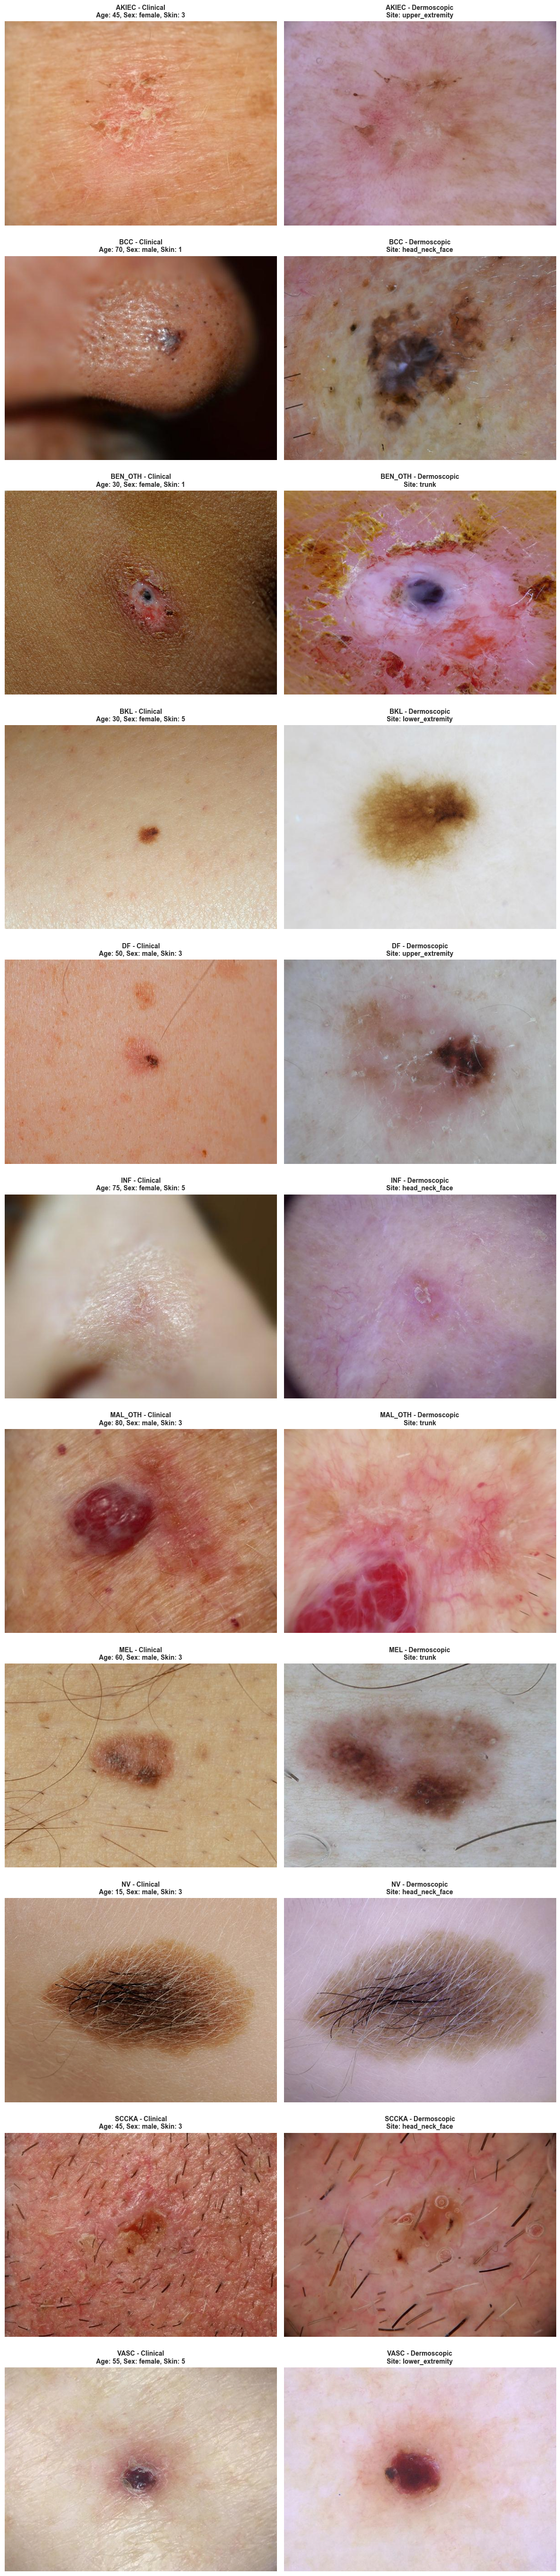

In [13]:
n_samples_per_class = 1  

fig, axes = plt.subplots(len(DIAGNOSIS_CATEGORIES), 2, figsize=(12, 5*len(DIAGNOSIS_CATEGORIES)))

for idx, category in enumerate(DIAGNOSIS_CATEGORIES):
    samples = full_df[full_df[category] == 1].head(n_samples_per_class)
    
    if len(samples) > 0:
        sample = samples.iloc[0]
        
        try:
            clinical_img = Image.open(sample['clinical_image_path'])
            axes[idx, 0].imshow(clinical_img)
            axes[idx, 0].set_title(f'{category} - Clinical\nAge: {sample["age_approx"]:.0f}, Sex: {sample["sex"]}, Skin: {sample["skin_tone_class"]:.0f}',
                                   fontsize=10, fontweight='bold')
            axes[idx, 0].axis('off')
        except Exception as e:
            axes[idx, 0].text(0.5, 0.5, f'Image not found', ha='center', va='center')
            axes[idx, 0].axis('off')
        
        try:
            dermoscopic_img = Image.open(sample['dermoscopic_image_path'])
            axes[idx, 1].imshow(dermoscopic_img)
            axes[idx, 1].set_title(f'{category} - Dermoscopic\nSite: {sample["site"]}',
                                   fontsize=10, fontweight='bold')
            axes[idx, 1].axis('off')
        except Exception as e:
            axes[idx, 1].text(0.5, 0.5, f'Image not found', ha='center', va='center')
            axes[idx, 1].axis('off')
    else:
        axes[idx, 0].text(0.5, 0.5, f'No samples for {category}', ha='center', va='center')
        axes[idx, 0].axis('off')
        axes[idx, 1].axis('off')

plt.tight_layout()
plt.show()

## 7. Class Imbalance Analysis

In [14]:
print("CLASS IMBALANCE ANALYSIS")
print("="*60)

max_count = full_class_counts.max()
min_count = full_class_counts.min()
imbalance_ratio = max_count / min_count

print(f"\n📊 Imbalance Statistics:")
print(f"  Most frequent class: {full_class_counts.idxmax()} ({max_count} cases)")
print(f"  Least frequent class: {full_class_counts.idxmin()} ({min_count} cases)")
print(f"  Imbalance ratio: {imbalance_ratio:.2f}:1")

print(f"\n⚖️ Class Weights (for handling imbalance):")
weights_df = pd.DataFrame(list(class_weights.items()), columns=['Category', 'Weight'])
weights_df = weights_df.sort_values('Weight', ascending=False)
print(weights_df.to_string(index=False))

CLASS IMBALANCE ANALYSIS

📊 Imbalance Statistics:
  Most frequent class: BCC (2522 cases)
  Least frequent class: MAL_OTH (9 cases)
  Imbalance ratio: 280.22:1

⚖️ Class Weights (for handling imbalance):
Category    Weight
 MAL_OTH 54.441558
 BEN_OTH 10.888312
    VASC 10.028708
     INF  9.527273
      DF  9.073593
   AKIEC  1.574756
     MEL  1.058586
   SCCKA  1.008177
     BKL  0.876071
      NV  0.638343
     BCC  0.188846


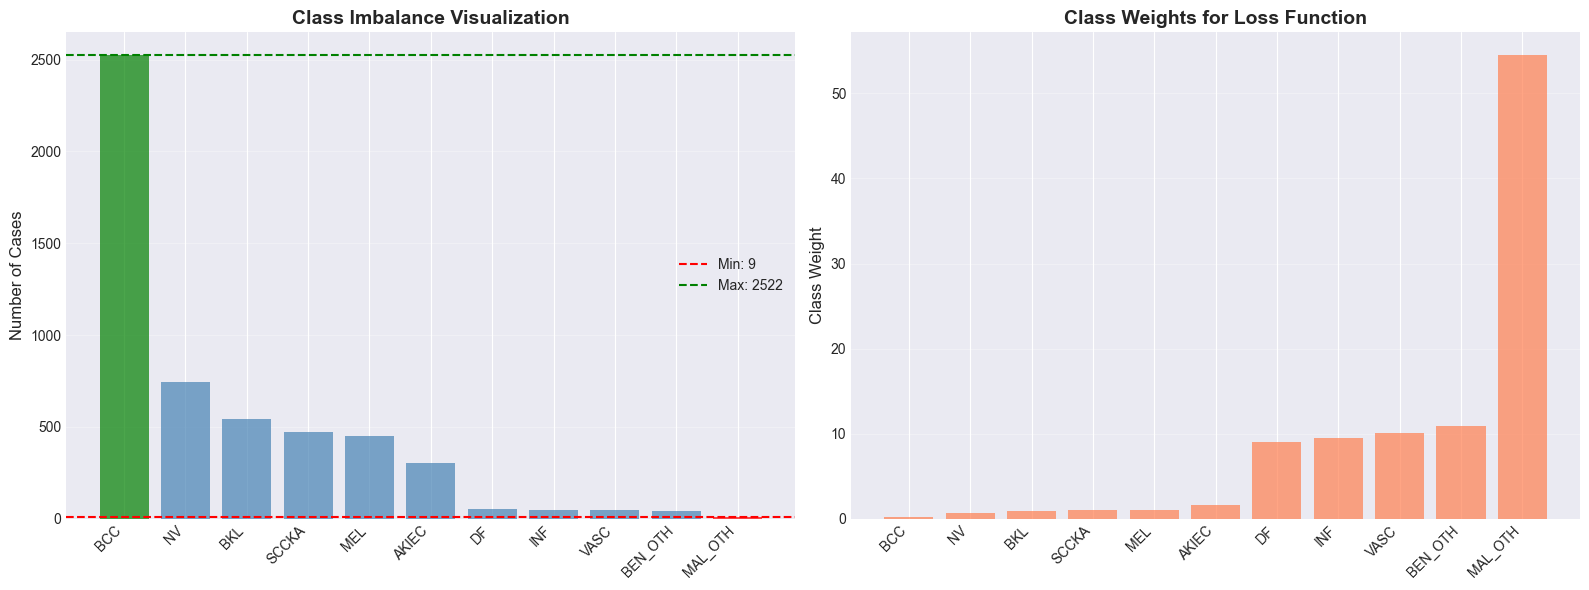

In [15]:
# Visualize class imbalance and weights
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Class counts with imbalance visualization
colors = ['red' if c == min_count else 'green' if c == max_count else 'steelblue' 
          for c in full_class_counts.values]
axes[0].bar(range(len(full_class_counts)), full_class_counts.values, color=colors, alpha=0.7)
axes[0].axhline(y=min_count, color='red', linestyle='--', label=f'Min: {min_count}')
axes[0].axhline(y=max_count, color='green', linestyle='--', label=f'Max: {max_count}')
axes[0].set_xticks(range(len(full_class_counts)))
axes[0].set_xticklabels(full_class_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Cases', fontsize=12)
axes[0].set_title('Class Imbalance Visualization', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Class weights visualization
weight_values = [class_weights[cat] for cat in full_class_counts.index]
axes[1].bar(range(len(weight_values)), weight_values, color='coral', alpha=0.7)
axes[1].set_xticks(range(len(full_class_counts)))
axes[1].set_xticklabels(full_class_counts.index, rotation=45, ha='right')
axes[1].set_ylabel('Class Weight', fontsize=12)
axes[1].set_title('Class Weights for Loss Function', fontsize=14, fontweight='bold')
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Correlation Analysis

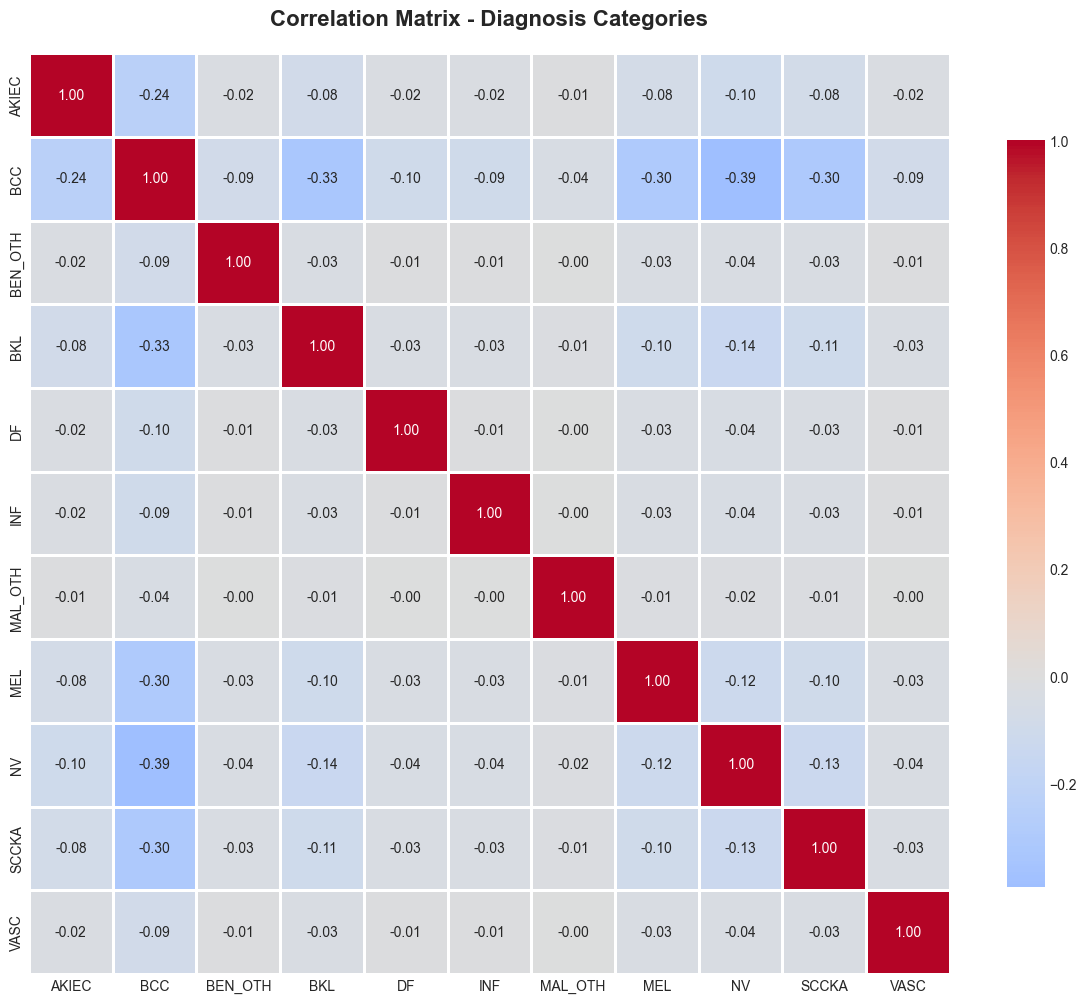

In [17]:
diagnosis_corr = full_df[DIAGNOSIS_CATEGORIES].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(diagnosis_corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Diagnosis Categories', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [18]:
multi_label_count = (full_df[DIAGNOSIS_CATEGORIES].sum(axis=1) > 1).sum()
single_label_count = (full_df[DIAGNOSIS_CATEGORIES].sum(axis=1) == 1).sum()

print("\nMULTI-LABEL ANALYSIS")
print("="*60)
print(f"Single-label cases: {single_label_count:,} ({single_label_count/len(full_df)*100:.2f}%)")
print(f"Multi-label cases: {multi_label_count:,} ({multi_label_count/len(full_df)*100:.2f}%)")

if multi_label_count > 0:
    print(f"\n⚠️ This is a multi-label classification problem!")
    print(f"   Some lesions have multiple diagnoses.")
else:
    print(f"\n✅ This is a single-label classification problem.")
    print(f"   Each lesion has exactly one diagnosis.")


MULTI-LABEL ANALYSIS
Single-label cases: 5,240 (100.00%)
Multi-label cases: 0 (0.00%)

✅ This is a single-label classification problem.
   Each lesion has exactly one diagnosis.


## 9. Missing Data Check

In [19]:
print("MISSING DATA ANALYSIS")
print("="*60)

missing_train = train_df.isnull().sum()
missing_val = val_df.isnull().sum()

print("\n📋 Training Set:")
missing_train_filtered = missing_train[missing_train > 0]
if len(missing_train_filtered) > 0:
    print(f"  Columns with missing values:")
    for col, count in missing_train_filtered.items():
        print(f"    {col}: {count} ({count/len(train_df)*100:.2f}%)")
else:
    print("  ✅ No missing values!")

print("\n📋 Validation Set:")
missing_val_filtered = missing_val[missing_val > 0]
if len(missing_val_filtered) > 0:
    print(f"  Columns with missing values:")
    for col, count in missing_val_filtered.items():
        print(f"    {col}: {count} ({count/len(val_df)*100:.2f}%)")
else:
    print("  ✅ No missing values!")

MISSING DATA ANALYSIS

📋 Training Set:
  Columns with missing values:
    age_approx: 15 (0.36%)
    site: 23 (0.55%)

📋 Validation Set:
  Columns with missing values:
    age_approx: 5 (0.48%)
    site: 8 (0.76%)


In [20]:
print("\n🖼️ IMAGE PATH VERIFICATION")
print("="*60)

def check_image_paths(df, dataset_name):
    missing_clinical = 0
    missing_dermoscopic = 0
    
    for idx, row in df.iterrows():
        if not Path(row['clinical_image_path']).exists():
            missing_clinical += 1
        if not Path(row['dermoscopic_image_path']).exists():
            missing_dermoscopic += 1
    
    print(f"\n{dataset_name}:")
    if missing_clinical == 0 and missing_dermoscopic == 0:
        print(f"  ✅ All image paths exist!")
    else:
        print(f"  ⚠️ Missing clinical images: {missing_clinical}")
        print(f"  ⚠️ Missing dermoscopic images: {missing_dermoscopic}")
    
    return missing_clinical, missing_dermoscopic

train_missing = check_image_paths(train_df, "Training Set")
val_missing = check_image_paths(val_df, "Validation Set")


🖼️ IMAGE PATH VERIFICATION

Training Set:
  ✅ All image paths exist!

Validation Set:
  ✅ All image paths exist!


## 10. Train/Val Split Verification

In [21]:
print("TRAIN/VAL SPLIT VERIFICATION")
print("="*60)

actual_train_ratio = len(train_df) / len(full_df)
actual_val_ratio = len(val_df) / len(full_df)

print(f"\n📊 Split Ratios:")
print(f"  Training: {actual_train_ratio:.1%} (expected: 80%)")
print(f"  Validation: {actual_val_ratio:.1%} (expected: 20%)")

if abs(actual_train_ratio - 0.8) < 0.01:
    print("  ✅ Split ratio is correct!")
else:
    print("  ⚠️ Split ratio deviates from expected 80/20")

TRAIN/VAL SPLIT VERIFICATION

📊 Split Ratios:
  Training: 80.0% (expected: 80%)
  Validation: 20.0% (expected: 20%)
  ✅ Split ratio is correct!


In [22]:
# Compare class distributions between train and val
print("\n📊 CLASS DISTRIBUTION COMPARISON (Train vs Val):")
print("="*60)
print(f"{'Category':<10} {'Train %':<10} {'Val %':<10} {'Difference':<12}")
print("-"*60)

for category in DIAGNOSIS_CATEGORIES:
    train_pct = (train_class_counts[category] / len(train_df)) * 100
    val_pct = (val_class_counts[category] / len(val_df)) * 100
    diff = abs(train_pct - val_pct)
    
    status = "✅" if diff < 2 else "⚠️"
    print(f"{category:<10} {train_pct:<10.2f} {val_pct:<10.2f} {diff:<10.2f} {status}")

print("\n✅ Stratification quality:")
avg_diff = sum([abs((train_class_counts[cat]/len(train_df) - val_class_counts[cat]/len(val_df))*100) 
                for cat in DIAGNOSIS_CATEGORIES]) / len(DIAGNOSIS_CATEGORIES)
print(f"  Average difference: {avg_diff:.2f}%")

if avg_diff < 2:
    print("  ✅ Excellent stratification!")
elif avg_diff < 5:
    print("  ✅ Good stratification!")
else:
    print("  ⚠️ Stratification could be improved")


📊 CLASS DISTRIBUTION COMPARISON (Train vs Val):
Category   Train %    Val %      Difference  
------------------------------------------------------------
AKIEC      5.77       5.82       0.05       ✅
BCC        48.14      48.09      0.05       ✅
BEN_OTH    0.83       0.86       0.02       ✅
BKL        10.38      10.40      0.02       ✅
DF         1.00       0.95       0.05       ✅
INF        0.95       0.95       0.00       ✅
MAL_OTH    0.17       0.19       0.02       ✅
MEL        8.59       8.59       0.00       ✅
NV         14.24      14.22      0.02       ✅
SCCKA      9.02       9.06       0.05       ✅
VASC       0.91       0.86       0.05       ✅

✅ Stratification quality:
  Average difference: 0.03%
  ✅ Excellent stratification!


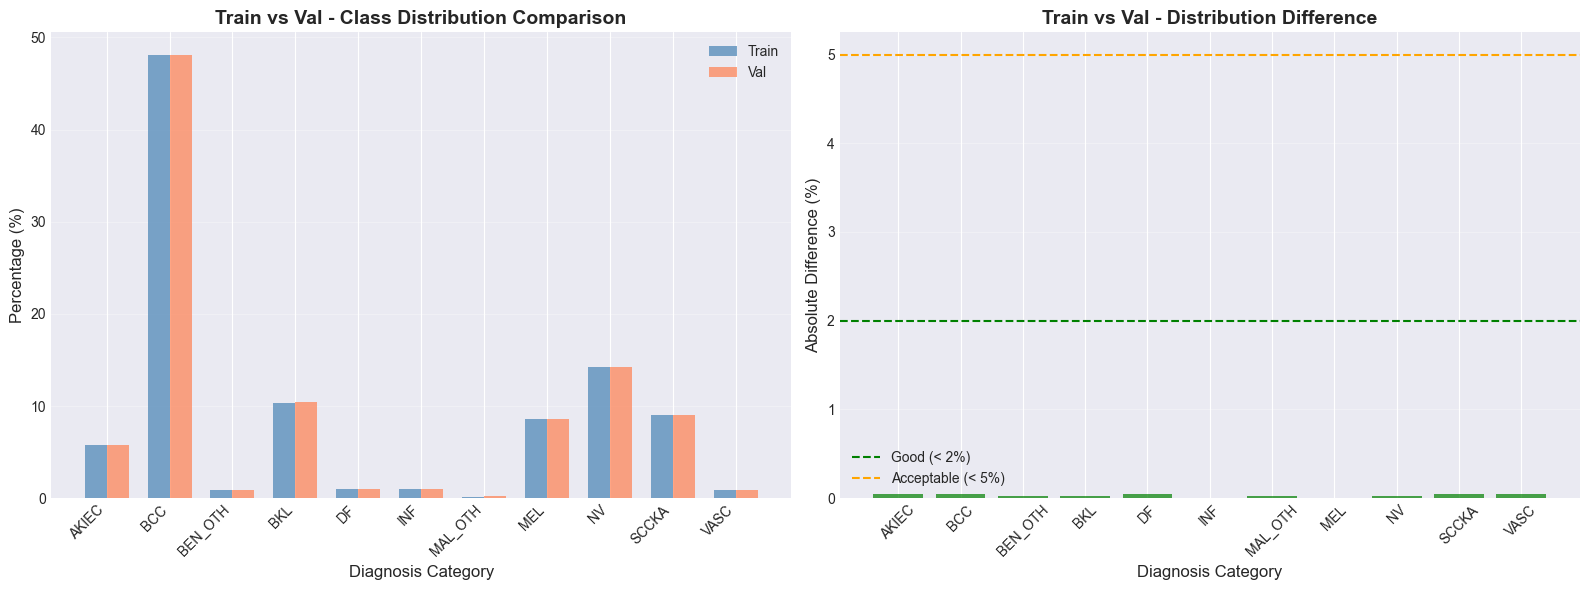

In [23]:
# Visualize train/val split comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Train vs Val class distribution
x = np.arange(len(DIAGNOSIS_CATEGORIES))
width = 0.35

train_percentages = [(train_class_counts[cat]/len(train_df))*100 for cat in DIAGNOSIS_CATEGORIES]
val_percentages = [(val_class_counts[cat]/len(val_df))*100 for cat in DIAGNOSIS_CATEGORIES]

axes[0].bar(x - width/2, train_percentages, width, label='Train', color='steelblue', alpha=0.7)
axes[0].bar(x + width/2, val_percentages, width, label='Val', color='coral', alpha=0.7)
axes[0].set_xlabel('Diagnosis Category', fontsize=12)
axes[0].set_ylabel('Percentage (%)', fontsize=12)
axes[0].set_title('Train vs Val - Class Distribution Comparison', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(DIAGNOSIS_CATEGORIES, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Difference visualization
differences = [abs(t - v) for t, v in zip(train_percentages, val_percentages)]
colors = ['green' if d < 2 else 'orange' if d < 5 else 'red' for d in differences]
axes[1].bar(DIAGNOSIS_CATEGORIES, differences, color=colors, alpha=0.7)
axes[1].axhline(y=2, color='green', linestyle='--', label='Good (< 2%)')
axes[1].axhline(y=5, color='orange', linestyle='--', label='Acceptable (< 5%)')
axes[1].set_xlabel('Diagnosis Category', fontsize=12)
axes[1].set_ylabel('Absolute Difference (%)', fontsize=12)
axes[1].set_title('Train vs Val - Distribution Difference', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45, labelsize=10)
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 📋 Summary & Conclusions

### Key Findings:
1. **Dataset Size**: 5,240 lesions with 10,480 images (clinical + dermoscopic)
2. **Train/Val Split**: 80/20 with good stratification
3. **Class Distribution**: Imbalanced dataset - class weights calculated for training
4. **Multi-label**: Check if lesions can have multiple diagnoses
5. **Metadata**: Complete information on age, sex, skin tone, anatomical sites
6. **MONET Scores**: 7 features for each image type (clinical + dermoscopic)
7. **Data Quality**: All image paths verified, no missing critical data

### Next Steps:
1. ✅ Data preprocessing completed
2. ✅ EDA and visualization completed
3. ⏭️ **Next**: Build and train baseline model
4. ⏭️ Experiment with different fusion strategies
5. ⏭️ Hyperparameter tuning
6. ⏭️ Model evaluation and submission

---

**🎉 EDA Complete! Ready for model training.**